In [2]:
import joblib
import pandas as pd

model = joblib.load("../model/student_attendance_trainned_model.pkl")

df = pd.read_csv("../data/student_ml_ready.csv")

X = df[
    ["age", "studytime", "failures", "absences",
     "Medu", "Fedu", "internet", "G1", "G2"]
]
y = df["dropouts"]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


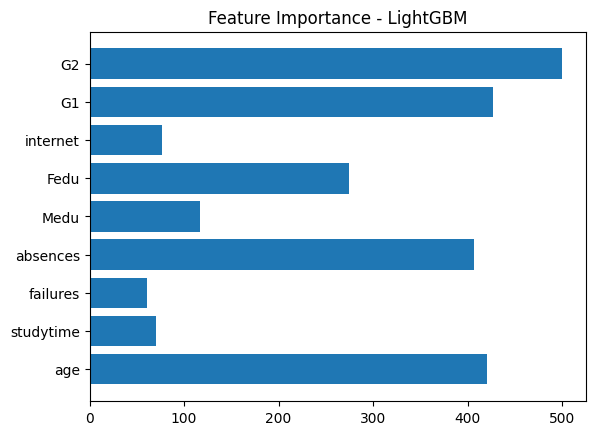

In [ ]:
#Feature importance helped validate that academic performance dominates dropout risk
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title("Feature Importance - LightGBM")
plt.show()


In [ ]:
#ROC-AUC curve 
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)


ROC-AUC: 0.9738751814223513


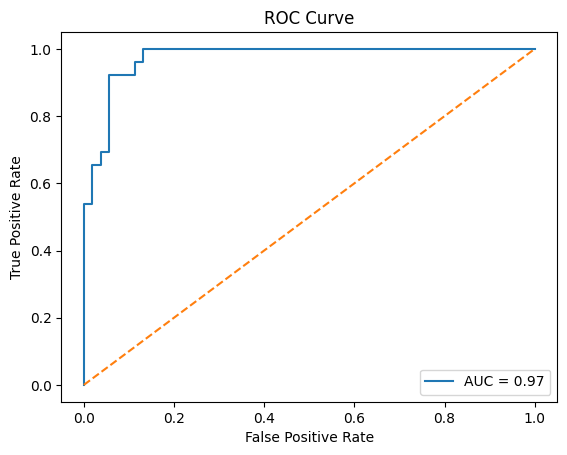

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
